In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import cooler
import serpentine as sp
import matplotlib.pyplot as plt
samples = pd.read_csv('../../samples.tsv', sep='\t', comment="#")
hgt = pd.DataFrame({
    'chrom': ['scaffold_34', 'scaffold_2'],
    'start': [27492, 1832629],
    'end': [28616, 1834423],
    'id': ['FUN_01063', 'FUN_005671']
})

In [2]:
merged_u = cooler.Cooler('../../data/output/cool/uninfected_merged_subsampled.cool')
merged_i= cooler.Cooler('../../data/output/cool/infected_merged_subsampled.cool')

### Zooms around HGT

Regions around putative HGT are plotted below for uninfected, infected and ratio. All maps are serpentine-binned.
All replicated in each condition were pooled separately, and the whole genome merged matrices were subsampled to the same coverage.

<IPython.core.display.Javascript object>


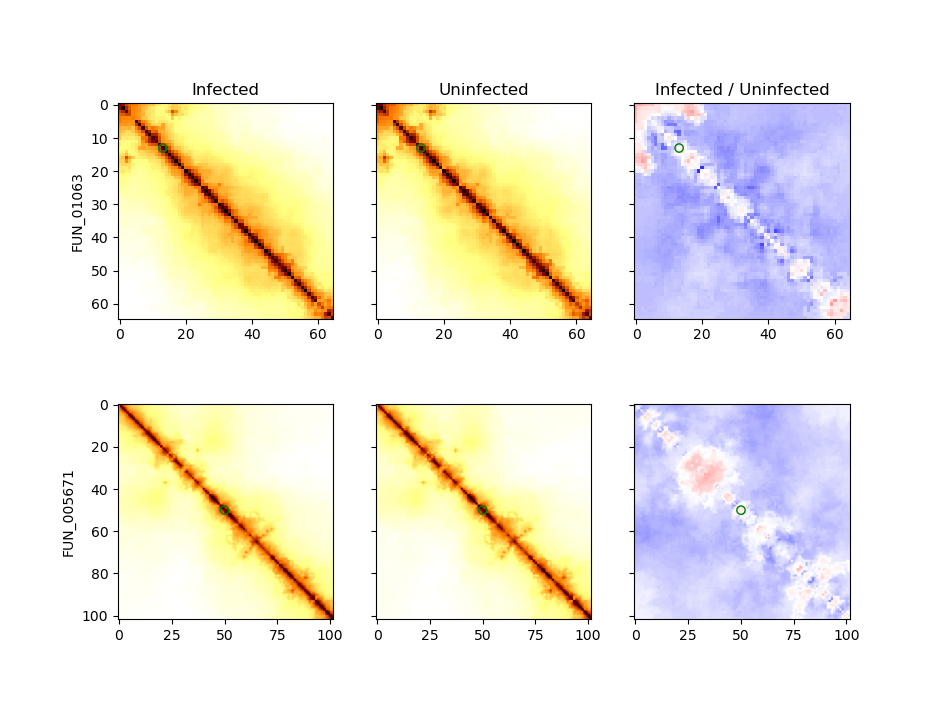

2020-08-17 18:40:37.467634 Starting 20 binning processes...
0	 Total serpentines: 2145 (100.0 %)
1	 Total serpentines: 1466 (68.34498834498835 %)
2	 Total serpentines: 569 (26.526806526806528 %)
3	 Total serpentines: 308 (14.35897435897436 %)
4	 Total serpentines: 228 (10.62937062937063 %)
5	 Total serpentines: 209 (9.743589743589743 %)
6	 Total serpentines: 207 (9.65034965034965 %)
7	 Total serpentines: 207 (9.65034965034965 %)
7	 Over: 2020-08-17 18:40:37.557617
0	 Total serpentines: 2145 (100.0 %)
1	 Total serpentines: 1444 (67.31934731934732 %)
2	 Total serpentines: 595 (27.73892773892774 %)
3	 Total serpentines: 297 (13.846153846153847 %)
4	 Total serpentines: 232 (10.815850815850816 %)
5	 Total serpentines: 213 (9.93006993006993 %)
6	 Total serpentines: 210 (9.79020979020979 %)
6	 Over: 2020-08-17 18:40:37.646679
0	 Total serpentines: 2145 (100.0 %)
1	 Total serpentines: 1471 (68.57808857808858 %)
2	 Total serpentines: 582 (27.132867132867133 %)
3	 Total serpentines: 297 (13.8461

0	 Total serpentines: 5253 (100.0 %)
1	 Total serpentines: 3511 (66.83799733485627 %)
2	 Total serpentines: 1309 (24.919093851132686 %)
3	 Total serpentines: 585 (11.136493432324386 %)
4	 Total serpentines: 334 (6.358271463925376 %)
5	 Total serpentines: 277 (5.273177232057872 %)
6	 Total serpentines: 260 (4.949552636588616 %)
7	 Total serpentines: 258 (4.911479154768704 %)
7	 Over: 2020-08-17 18:40:39.854604
0	 Total serpentines: 5253 (100.0 %)
1	 Total serpentines: 3519 (66.99029126213593 %)
2	 Total serpentines: 1311 (24.957167332952597 %)
3	 Total serpentines: 570 (10.850942318675044 %)
4	 Total serpentines: 334 (6.358271463925376 %)
5	 Total serpentines: 272 (5.17799352750809 %)
6	 Total serpentines: 258 (4.911479154768704 %)
6	 Over: 2020-08-17 18:40:40.008252
0	 Total serpentines: 5253 (100.0 %)
1	 Total serpentines: 3537 (67.33295259851513 %)
2	 Total serpentines: 1314 (25.01427755568247 %)
3	 Total serpentines: 563 (10.71768513230535 %)
4	 Total serpentines: 330 (6.28212450028

In [9]:
%matplotlib notebook
# Define window size around genes of interest
zoom_radius = 100000
# We'll show 1 gene per row, 3 panels each (infected, uninfected, ratio)
fig, ax = plt.subplots(hgt.shape[0], 3, sharex='row', sharey='row')
ax[0, 0].set_title("Infected")
ax[0, 1].set_title("Uninfected")
ax[0, 2].set_title("Infected / Uninfected")

# Iterate over HGTs
for i, gene in hgt.iterrows():
    # Transform gene coords into UCSC string (chr:start-end), use max to prevent negative coords
    region = f"{gene.chrom}:{max(0, gene.start - zoom_radius)}-{gene.end + zoom_radius}"
    # Compute pixel coordinate of the gene in the zoom matrix
    gene_coord = zoom_radius//2000 if gene.start > zoom_radius else (zoom_radius - (zoom_radius - gene.start))//2000
    # Extract matrices for both conditions
    uninf = merged_u.matrix(balance=False).fetch(region)
    inf = merged_i.matrix(balance=False).fetch(region)
    # Use serpenting for adaptative binning + ratio
    serpi, serpu, serprat = sp.serpentin_binning(inf, uninf, triangular=True, parallel=1, iterations=20)
    # Plot all 3 matrices
    ax[i, 0].imshow(np.log(serpi), cmap="afmhot_r")
    ax[i, 1].imshow(np.log(serpu), cmap="afmhot_r")
    ax[i, 2].imshow(serprat, cmap='bwr', vmax=2, vmin=-2)
    ax[i, 0].set_ylabel(gene['id'])
    # Add a circle on the image where the gene is located
    for j in range(3):
        ax[i, j].scatter(gene_coord, gene_coord, fc='none', ec='green', marker='o')

plt.show()

In [121]:
for i, spl in enumerate(samples.library):
    spl_path = f"../../data/output/chromosight/{spl}/loops_quant.tsv"
    if i:
        spl_loops = pd.read_csv(spl_path, sep='\t', usecols=[6, 7, 8]).rename(columns={'score': spl})
        merged_loops = merged_loops.merge(spl_loops, left_on=['bin1', 'bin2'], right_on=['bin1', 'bin2'])
    else:
        merged_loops = pd.read_csv(spl_path, sep='\t')
        merged_loops = merged_loops.rename(columns={"score": spl}).drop(['pvalue', 'qvalue'], axis=1)

<IPython.core.display.Javascript object>


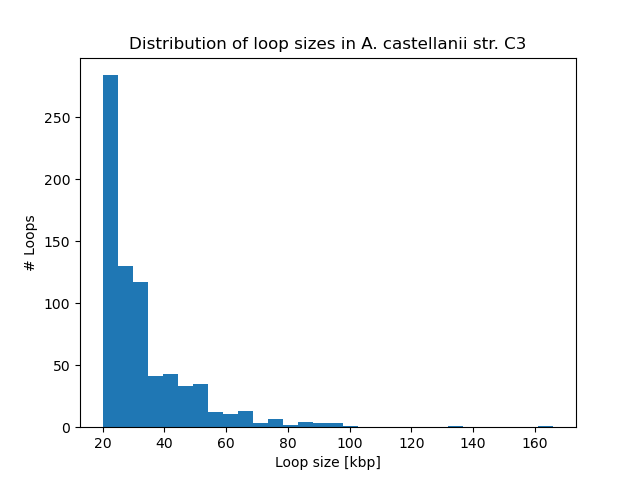

Text(0, 0.5, '# Loops')

In [138]:
%matplotlib notebook
import matplotlib.pyplot as plt
sizes = (merged_loops.start2 - merged_loops.start1)
sizes = sizes[sizes < 200000] / 1000
a = plt.hist(sizes, 30)
plt.title("Distribution of loop sizes in A. castellanii str. C3")
plt.xlabel("Loop size [kbp]")
plt.ylabel("# Loops")




In [123]:
combined_loops = merged_loops.melt(value_vars=samples.library.values, id_vars=merged_loops.columns[:5])
combined_loops = combined_loops.rename(columns={'variable': 'sample', 'value': 'score'})

In [124]:
samples = samples.set_index(samples.library)
combined_loops['condition'] = combined_loops['sample'].apply(lambda x: samples.condition[x])
combined_loops['size'] = combined_loops['start2'] - combined_loops['start1']

<IPython.core.display.Javascript object>


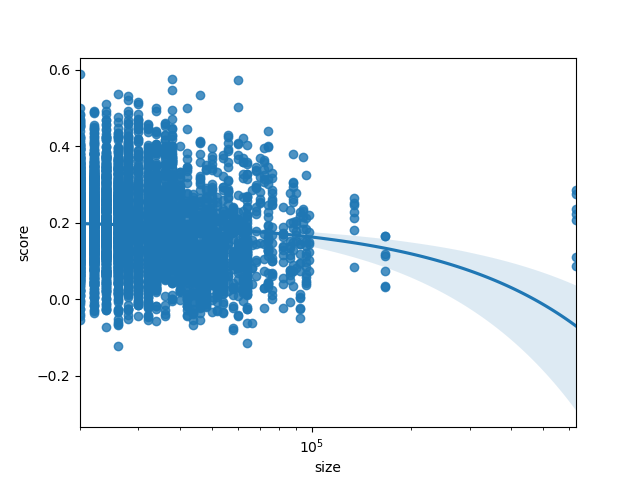

In [152]:
%matplotlib notebook
import seaborn as sns
ax = sns.regplot(data=combined_loops, x='size', y = 'score')
ax.set_xscale('log')

In [126]:
uninf_loops = (
    combined_loops.loc[combined_loops.condition == 'uninfected', :]
    .groupby(['chrom1', 'start1', 'chrom2', 'start2'])
    .score
    .agg(np.nanmedian)
    .reset_index()
)

In [127]:
inf_loops = (
    combined_loops.loc[combined_loops.condition == 'infected', :]
    .groupby(['chrom1', 'start1', 'chrom2', 'start2'])
    .score
    .agg(np.nanmedian)
    .reset_index()
)

In [128]:
med_loops = pd.merge(inf_loops, uninf_loops, on=['chrom1', 'start1', 'chrom2', 'start2'],suffixes=['_i', '_u'])

<IPython.core.display.Javascript object>


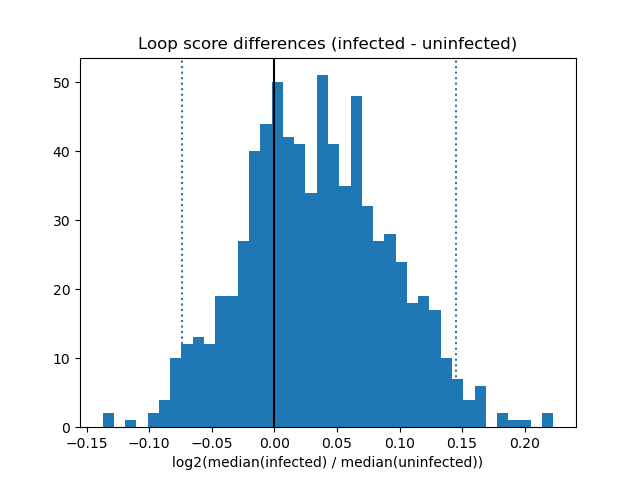

Text(0.5, 0, 'log2(median(infected) / median(uninfected))')

In [199]:
%matplotlib notebook
lo_perc, up_perc = 2.5, 97.5
lratios = med_loops.score_i - med_loops.score_u
lratios = lratios[~np.isnan(lratios)]
a = plt.hist(lratios, 40)
plt.axvline(0, c='black')
plt.axvline(np.percentile(lratios, up_perc), ls=':')
plt.axvline(np.percentile(lratios, lo_perc), ls=':')
plt.title("Loop score differences (infected - uninfected)")
plt.xlabel("log2(median(infected) / median(uninfected))")

<IPython.core.display.Javascript object>


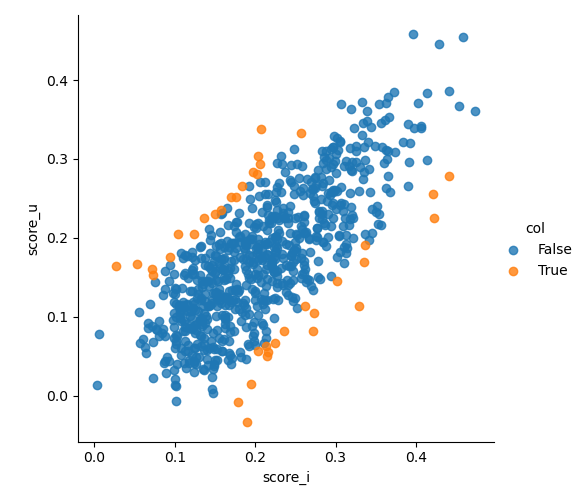

In [200]:
%matplotlib notebook
med_loops['col'] =  (lratios < np.percentile(lratios, lo_perc)) | (lratios > np.percentile(lratios, up_perc))
sns.lmplot(data=med_loops, x="score_i", y="score_u", hue="col", fit_reg=False)

In [201]:
import scipy.stats as ss
ss.ttest_rel(med_loops.score_u, med_loops.score_i)

Ttest_relResult(statistic=-16.218366077811037, pvalue=7.053124098328212e-51)

In [202]:
ss.wilcoxon(med_loops.score_u, med_loops.score_i,)

WilcoxonResult(statistic=56797.0, pvalue=2.0687549636909443e-44)